In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
import pandas as pd

file_names = ['Argentina2017', 'Brasil2018', 'Brasil2006', 'Brasil2014', 'Chile2012', 'Chile2018', 'Colombia05-06', 'Colombia2012', 'Colombia2018', 'Ecuador2013', 'Ecuador2018', 'Mexico2012', 'Peru2006', 'Peru2012', 'Peru2018', 'Chile2006']

periodo1 = ['05-06', '2006', ]
periodo2 = ['2012', '2013', '2014']
periodo3 = ['2018']

df_periodo1, df_periodo2, df_periodo3 = [], [], []
for name in file_names:
    #df_dict[name] = pd.read_csv('/content/drive/MyDrive/datos/'+name+'_filtrado.csv')
    #df_dict[name]['Year'] = name[-4:]
    df = pd.read_csv('/content/drive/MyDrive/datos/' + name + '_filtrado.csv')
    #df['Country'] = name[:-4]
    year = name[-4:]
    if year in periodo1 or name == 'Colombia05-06': df_periodo1.append(df)
    if year in periodo2: df_periodo2.append(df)
    if year in periodo3: df_periodo3.append(df)

df_periodo1 = pd.concat(df_periodo1, ignore_index=True)
df_periodo2 = pd.concat(df_periodo2, ignore_index=True)
df_periodo3 = pd.concat(df_periodo3, ignore_index=True)


In [ ]:
print(len(df_periodo1))
print(len(df_periodo2))
print(len(df_periodo3))


7025
8410
6882


In [ ]:
def missing_values(df):
    for i in df.columns:
        if df[i].isnull().any():
            df[i].fillna(df[i].mean(), inplace = True)
    return df

missing_values(df_periodo1)
missing_values(df_periodo2)
missing_values(df_periodo3)

,Q1: Important in life: Family,Q2: Important in life: Friends,Q6: Important in life: Religion,Q57: Most people can be trusted,Q94: Active/Inactive membership: church or religious org,Q241: Democracy: Governments tax the rich and subsidize the poor
0,1,1,4,2,0,1
1,1,2,-1,2,0,4
2,1,2,2,-1,2,-1
3,2,2,2,2,0,5
4,1,2,3,2,0,1
...,...,...,...,...,...,...
6877,1,2,1,2,1,4
6878,1,3,1,2,0,9
6879,1,3,1,2,1,5
6880,1,3,1,2,1,5


In [ ]:
df_norm1 = ((df_periodo1-df_periodo1.min())/ (df_periodo1.max() - df_periodo1.min())).dropna(axis=1, inplace=False)
df_norm2 = ((df_periodo2-df_periodo2.min())/ (df_periodo2.max() - df_periodo2.min())).dropna(axis=1, inplace=False)
df_norm3 = ((df_periodo3-df_periodo3.min())/ (df_periodo3.max() - df_periodo3.min())).dropna(axis=1, inplace=False)


In [ ]:
individualist_vars = {1:[
    'V5: Important in life: Friends',
    'V23: Most people can be trusted',
    'V81: Schwartz: It is important to this person to be rich',
    'V5_CO: Friends important (Colombia)'
], 2:[
    'V5: Important in life: Friends',
    'V23: Satisfaction with your life',
    'V24: Most people can be trusted',
    'V71: Schwartz: It is important to this person to be rich'
], 3:['Q2: Important in life: Friends',
    'Q57: Most people can be trusted']}

colectivist_vars = {1:['V4: Important in life: Family',
    'V9: Important in life: Religion',
    'V24: Active/Inactive membership of church or religious organization',
    'V84: Schwartz: It is important to this person to help the people nearby',
    'V125: How much you trust: Your family (B)',
    'V152: Democracy: Governments tax the rich and subsidize the poor.',
    'V4_CO: Family important (Colombia)',
    'V9_CO: Religion important (Colombia)'
], 2:[
    'V9: Important in life: Religion',
    'V25: Active/Inactive membership of church or religious organization',
    'V74: Schwartz: It is important to this person to do something for the good of society',
    'V102: How much you trust: Your family (B)',
    'V131: Democracy: Governments tax the rich and subsidize the poor.'
], 3:['Q1: Important in life: Family',
    'Q6: Important in life: Religion',
    'Q94: Active/Inactive membership: church or religious org',
    'Q241: Democracy: Governments tax the rich and subsidize the poor']}

In [ ]:
df_ind1 = df_norm1[individualist_vars[1]]
df_ind2 = df_norm2[individualist_vars[2]]
df_ind3 = df_norm3[individualist_vars[3]]

df_col1 = df_norm1[colectivist_vars[1]]
df_col2 = df_norm2[colectivist_vars[2]]
df_col3 = df_norm3[colectivist_vars[3]]

df_inds = [df_ind1, df_ind2, df_ind3]
df_cols = [df_col1, df_col2, df_col3]


In [ ]:
slopes_ind1 = df_ind2.mean(axis=1).mean() - df_ind1.mean(axis=1).mean()
slopes_ind2 = df_ind3.mean(axis=1).mean() - df_ind2.mean(axis=1).mean()
print(slopes_ind1)
print(slopes_ind2)

slopes_col1 = df_col2.mean(axis=1).mean() - df_col1.mean(axis=1).mean()
slopes_col2 = df_col3.mean(axis=1).mean() - df_col2.mean(axis=1).mean()
print(slopes_col1)
print(slopes_col2)

0.018262797544312037
0.06707286835746151
0.015009590653830118
0.07382471224052845


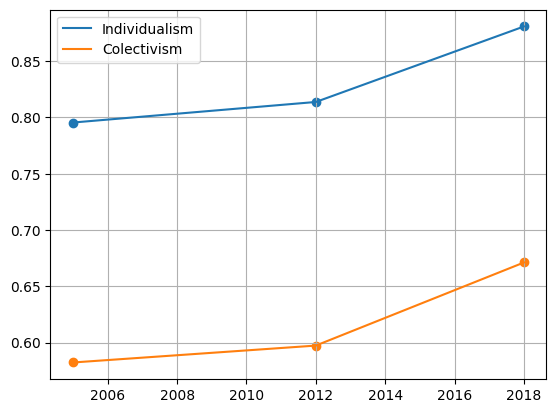

In [ ]:
import matplotlib.pyplot as plt

plt.plot([2005, 2012, 2018], [df.mean(axis=1).mean() for df in df_inds], label='Individualism')
plt.scatter([2005, 2012, 2018], [df.mean(axis=1).mean() for df in df_inds])

plt.plot([2005, 2012, 2018], [df.mean(axis=1).mean() for df in df_cols], label='Colectivism')
plt.scatter([2005, 2012, 2018], [df.mean(axis=1).mean() for df in df_cols])


plt.legend()
plt.grid()


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(df_ind1)
kmeans.labels_

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [ ]:
print('Variables individualistas\n')
print(df_ind1.mean(axis=0).mean())
print('\nVariables colectivistas\n')
print(df_col1.mean(axis=0).mean())

Variables individualistas

0.7954621826380106

Variables colectivistas

0.5822793510821986


**Описание переменных:**

* `Important in life: Family` - важность семьи в жизни
* `Important in life: Friends` - важность друзей в жизни
* `Important in life: Religion` - важность религии в жизни
* `Most people can be trusted` - считает, что большинству людям можно доверять
* `Active/Inactive membership of church or religious organization` - ходит ли человек в церковь или состоит в религиозной организации
* `Schwartz: It is important to this person to be rich` - считают ли люди важным стать богатым
* `Schwartz: It is important to this person to help the people nearby` - считают ли люди важным помогать окружающим
* `How much you trust: Your family` - насколько люди доверяют своей семье
* `Democracy: Governments tax the rich and subsidize the poor` - оценка демократии в стране (правительства облагают налогами богатых и субсидируют бедных)
* `Year` - год (2006, 2012, 2013, 2014, 2017, 2018)
* `Country` - стран (Бразилия, Перу, Уругвай, Чили, Колумбия, Эквадор, Мексика, Аргентина)
* `Satisfaction with your life` - насколько люди удовлетворены своей жизнью